# Microwave and Radar Remote Sensing - WS1

## Antennas

Antennas are the elements of MRRS systems that interact with the environment, converting electrical energy into radiated electromagnetic energy and vice versa. During this workshop, we will introduce basic characteristics of antennas that are relevant for understanding the imaging characteristics of microwave sensors. The goal of this workshop is to move from a theoretical to a more concrete approach by creating simulations and getting a better feel for antenna radiation characteristics.

To start our simulations, we first need to check that we have set up the environment correctly and that all the necessary packages are installed. The following line of code will

1) check the Python environment you are currently using

2) import the required Python packages (if it fails, the package is probably not installed correctly in the environment)

In [1]:
import sys
print(sys.executable)

/Users/alanromer/miniconda3/envs/TUB_MSSR/bin/python


In [2]:
import scipy.constants as constants
import matplotlib.pyplot as plt
import numpy as np

### From the theory

The basic characteristic of antennas, called **directivity**, is their ability to confine the radiated energy into a limited portion of space. 

The non-directive antenna, i.e., radiating in all directions of space, is called **isotropic**. The antenna reference frame is preferably represented using a set of spherical coordinates in which the two angular components sweep the *azimuth* and *elevation* planes, denoted in the following as $\theta_\mathrm{az}$ and $\theta_\mathrm{el}$, respectively. This reference frame is typically used as the basic reference frame of MSSR systems.

The directivity of the antenna is quantified using the ratio of **radiated intensity in a given direction** over the average radiated intensity, i.e., 

$$D(\theta_\mathrm{el}, \theta_\mathrm{az})=4\pi\cdot\frac{A(\theta_\mathrm{el}, \theta_\mathrm{az})}{\iint_{\Omega} \mathrm{d}\Omega\cdot A(\theta_\mathrm{el}, \theta_\mathrm{az})}\quad ,$$

where $A(\cdot)$ represents the radiated intensity, or radiated power per solid angular unit. **The directivity of the isotropic antenna is one**. Passive antennas are typically reciprocal devices and their directivity both describes their behaviour on transmission and reception. In many practical cases, the directivity function is separable in the two angular components, i.e.,

$$D(\theta_\mathrm{el}, \theta_\mathrm{az})\approx D_\mathrm{el}(\theta_\mathrm{el})\cdot D_\mathrm{az}(\theta_\mathrm{az})\quad .$$

Each of the functions above describe the behaviour of the antenna, and the system, on the azimuth and elevation planes, respectively. In our cases of interest, **the radiated intensity of a simple antenna can be shown to be proportional to the square of the Fourier transform of the current density** feeding the antenna, i.e., 

$$D(\theta) \propto |\mathcal{F}[i(x)]|^2\quad ,$$

where $x$ refers to a spatial variable along the plane under consideration (azimuth or elevation), and for simplicity we have removed the subindex of $\theta$. 

The relationship between the transformed variable $k_x$ and $\theta$ can be shown to be as follows

$$k_x = \frac{2\pi}{\lambda}\cdot \sin\theta\quad ,$$

where $\lambda$ represents the wavelength of the transmitted waves, which can be related to the frequency as follows

$$\lambda=\frac{\mathrm{c}_0}{f_0}\quad ,$$

being $\mathrm{c}_0$ the velocity of propagation of the wave in the considered medium.

### Exercise 1

Typical frequencies of spaceborne MRRS systems cover the range between 400 MHz and 10 GHz. The plot below shows the equivalence between these frequencies and their wavelengths. Please identify the microwave frequency bands according to the IEEE denomination standard.

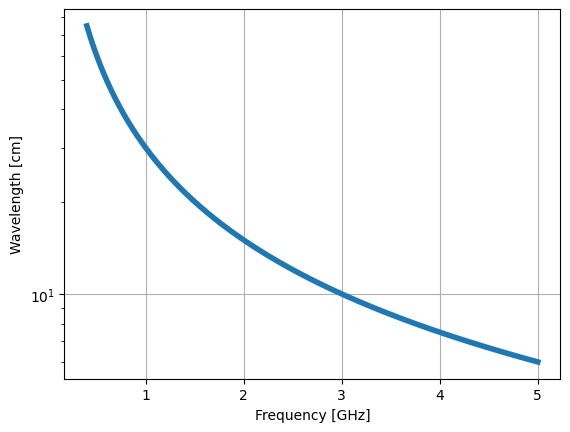

In [3]:
N  = 128
f0 = np.arange(N) / (N-1) * 4.6e9 + 400e6
wl = constants.c / f0

plt.figure()
plt.plot(f0/1.e9, wl * 1e2, lw = 4)
plt.yscale('log')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Wavelength [cm]')
plt.grid()
plt.show()

### Answer 1

...

X) f = 8-12 GHz

C) f = 4-8 GHz

L) f= 1-2 GHz

...

### Exercise 2

Assuming a **constant current density** feeding the antenna, the radiation pattern can be approximated as follows

$$D(\theta)=k_1\cdot \left|\mathcal{F}\left[\Pi\left(\frac{x}{L}\right)\right]\right|^2\\
=k\cdot\mathrm{sinc}\left(\frac{k_x}{2\pi}\cdot L\right)^2\\
=k\cdot \mathrm{sinc}\left(\frac{L}{\lambda}\cdot \sin\theta\right)^2\quad ,$$

where $k$ is a constant, $\Pi(\cdot)$ represents a pulse function and $\mathrm{sinc}(x)=\sin(\pi\cdot x)/(\pi\cdot x)$. 
In the figure below, you need to show the normalized result (in dB) for an **antenna of size 1 m** operating at a **wavelength of 10 cm**.

In this exercise, you will need first to complete the code by writing a function **getPattern** that returns the antenna radiation pattern. You can assume $k=1$. 

In [4]:
N   = 1024
th  = -np.pi/8. + np.arange(N) / (N-1) * np.pi/4.

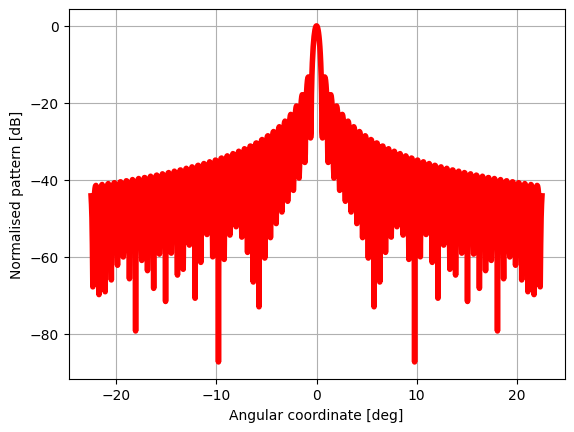

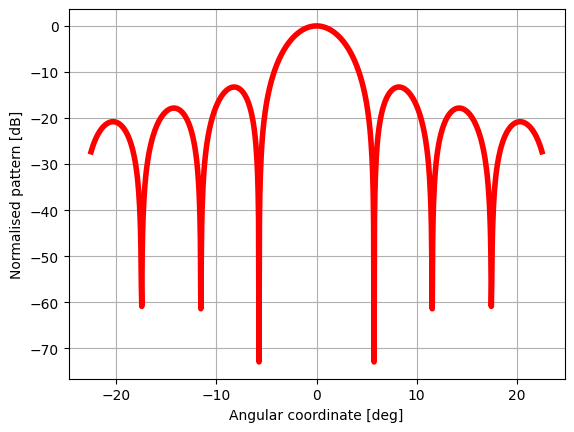

In [5]:
N   = 1024
th  = -np.pi/8. + np.arange(N) / (N-1) * np.pi/4.
L   = 1
wl  = 0.1

# write a function (getPattern) to form the antenna pattern

def getPattern(wl, L, th):
    ret= np.arange(N)
    ret=np.square(np.sinc((L/wl)*np.sin(th)))
    return ret
###
pat = getPattern(wl, 10, th)

plt.figure()
plt.plot(th * 180. / np.pi, 10 * np.log10(pat), 'r', lw = 4)
plt.xlabel('Angular coordinate [deg]')
plt.ylabel('Normalised pattern [dB]')
plt.grid()
plt.show()

pat = getPattern(wl, L, th)

plt.figure()
plt.plot(th * 180. / np.pi, 10 * np.log10(pat), 'r', lw = 4)
plt.xlabel('Angular coordinate [deg]')
plt.ylabel('Normalised pattern [dB]')
plt.grid()
plt.show()

What is the role of the size of the antenna in the radiation pattern and the illuminated scene? What is the role of the operating wavelength for a constant antenna size? Try to change the input parameters of the previous code to provide your answer.

### Answer 2
Decrease in the distance between the lobes, but significant drop in energy with increasing angle.
Decreasing the spacing between the lobes results in a higher resolution of the Image.
...


### Exercise 3

From the engineering persepective, the main lobe illuminates the area of interest. The part of the main lobe radiating or capturing most of the power is called the **aperture** of the antenna, and helps approximate the radiation of the antenna as a pass/reject system. 

The aperture in radians can be approximated as 

$$\theta_\mathrm{ap}\approx \frac{\lambda}{L}\quad .$$


Modify the following code to show the angular extension covered by the aperture approximation. 

In [6]:
patI= np.ones(N)
print(np.shape(patI))

(1024,)


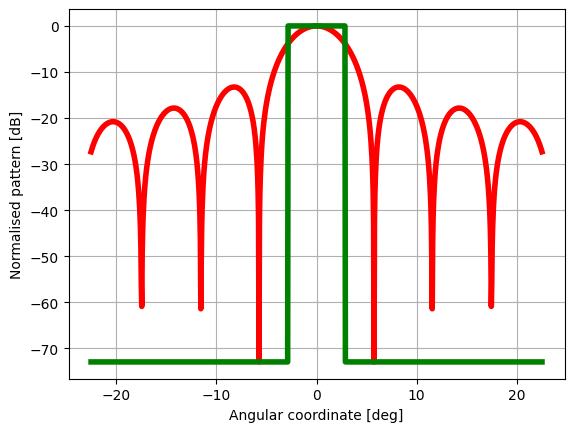

In [7]:
# complete the code to show the angular extension by using the formula above. 

patI= np.ones(len(th))
th_ap=wl/L/2
pat = getPattern(wl,L,th)
xlist = th_ap>=abs(th)
patI[np.logical_not(xlist)]=np.min(pat)

### **your code here**
#xmin=int(10 * np.log10(N/2-wl/L))
#xmax=int(10 * np.log10(N/2+wl/L))
#print(xmin)
#print(xmax)
#patI[0:xmin]=np.min(pat)
#patI[xmax:1024]=np.min(pat)

plt.figure()
plt.plot(th * 180. / np.pi, 10 * np.log10(pat), 'r', lw = 4)
plt.plot(th * 180. / np.pi, 10 * np.log10(patI), 'g', lw = 4)
plt.xlabel('Angular coordinate [deg]')
plt.ylabel('Normalised pattern [dB]')
plt.grid()
plt.show()

### Acknowledgements 
Marc Rodriguez-Cassola and Andreas Reigber

In [8]:
!pip3 install scipy


In [9]:
!pip3 install matplotlib